## **Introduction**

<img src="bees2.jpg" height=10% width=50%>

Bees are import pollinators and largely rely on pollen and plant nectar as their primary food source. Reductions in plant abundance and diversity due to land use change is considered a factor in the observed decline in bee populations across the globe. To help provide good resources for bees, many seed companies, botanical associations and other groups have compiled and promoted "pollinator friendly" plant lists and/or seed mixes. However, there is limited evidence as to whether or not the pollen and nectar from these mixes are indeed attractive to pollinators. Furthermore, given that these mixes typically include native and non-native species, there is some concern that non-native species may adversely affect native bee communities by provide floral resources of inappropriate nutritional value or advantage generalist bee species.

In order to provide guidance on the make-up of local bee-friendly spaces, some data on native and non-native plants and their effect on pollinator bees was collected. This included when, where and how the sample was taken, the species of plant, the species of bees observed, and other details about the bees, include whether or not they are native, nesting habits, and parasitic status.

The primary objective was to be able to provide recommendations on which plants created an optimised environment for pollinator bees. However, additional research questions included:
- whether there were any differences in the plants preferred by native vs non-native bee species
- a case study analysis of the distribution of bee and plant species across one of the samples
- the top three plant species preferred by native bees.

The report found that:
1. The overall preference for bee species type (native / unknown / non-native) for native / non-native plant species was statistically insignificant based on the results of one-proportion Z tests.
2. Site B's bee species type profile was statistically significantly different from the other two.
3. Whilst over 50% of each bee species type were sampled from the air instead of a plant, native bees were typically found on *Leucanthemum vulgare* (ox-eye daisy) and *Rudbeckia hirta* (black-eyed susan) plants, non-native bees were only found on *Trifolium incarnatum* (crimson clover) and *Daucus carota* (Queen Anne's lace) plants, and unknown bees were typically found on *Melilotus officinalis* (sweet yellow clover) and *Rudbeckia hirta* plants.
4. There was a range of plant species specialisation across the bee species in the dataset. *Halictus poeyi/ligatus* or Poey's Furrow Bee was a clear generalist.

The report recommends that:
1. The top three plants that should be planted to support native bee populations are:
    1. Leucanthemum vulgare
    2. Rudbeckia hirta, and
    3. Daucus carota.
2. If there is an opportunity to select additional species, then Melilotus officinalis and Trifolium incarnatum should be the next two (in that order).
3. Further analysis be conducted to confirm the species or at least whether or not they are native bees of the unknown bees.
4. The bee-friendly spaces also include suitable pieces of wood as native bees are predominantly ground or wood nesters (non-native bees almost exclusively nest in hives).

<img src="L plant.jpg" height=10% width=30%>  <img src="R plant.jpg" height=10% width=30%>  <img src="D plant.jpg" height=10% width=30%>

## **Data**

Data was collected on native and non-native plants across three different collection sites, including their effects on pollinator bees. Details of the dataset are as follows:

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bees in the sample for a particular species. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

After initial inspection of the dataset, the variables `specialised_on` and `status` were dropped due to extensive missingness present (99% of observations). In addition, the variable `nonnative_bee` was turned around and relabelled `native_bee` as the focus of the report was on native bees and thus it made more intuitive sense than the original representation.

In [1]:
install.packages(c("naniar", "cowplot", "bipartite"))

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/naniar_1.0.0.tar.gz' ...
	OK [downloaded 2.6 Mb in 0.8 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/norm_1.0-11.0.tar.gz' ...
	OK [downloaded 81 Kb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/visdat_0.6.0.tar.gz' ...
	OK [downloaded 1.1 Mb in 1.1 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/UpSetR_1.4.0.tar.gz' ...
	OK [downloaded 4.1 Mb in 0.8 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/cowplot_1.1.1.tar.gz' ...
	OK [downloaded 1.3 Mb in 0.7 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/bipartite_2.18.tar.gz' ...
	OK [downloaded 1.7 Mb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/fields_14.1.tar.gz' ...
	OK [

In [2]:
suppressPackageStartupMessages(library(tidyverse))
library(naniar)
library(stringr)
library(cowplot)
library(bipartite)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: sna

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.18.1 (2023-01-24), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.7-1 created on 2023-01-24.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.


 This is bipartite 2.18.
 For latest changes see versionlog in ?"bipartite-packag

In [3]:
# suppress summarise info
options(dplyr.summarise.inform = FALSE)

In [4]:
bees_orig <- read_csv("data/plants_and_bees.csv", show_col_types = FALSE,  na = c("", "NA", "null", "None"))

bees_orig <- bees_orig %>%
    mutate(date = mdy(date),
           plant_species = replace_na(plant_species, "Air"),
           across(c(parasitic, nonnative_bee), ~ifelse(.x == 0, "No", "Yes")))
glimpse(bees_orig)

Rows: 1,250
Columns: 16
$ sample_id      <dbl> 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17400,…
$ species_num    <dbl> 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,…
$ date           <date> 2017-04-18, 2017-04-18, 2017-04-18, 2017-04-18, 2017-0…
$ season         <chr> "early.season", "early.season", "early.season", "early.…
$ site           <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", …
$ native_or_non  <chr> "native", "native", "native", "native", "native", "nati…
$ sampling       <chr> "pan traps", "pan traps", "pan traps", "pan traps", "pa…
$ plant_species  <chr> "Air", "Air", "Air", "Air", "Air", "Air", "Air", "Air",…
$ time           <dbl> 935, 935, 935, 935, 935, 935, 935, 935, 935, 935, 935, …
$ bee_species    <chr> "Augochlorella aurata", "Agapostemon texanus", "Augochl…
$ sex            <chr> "f", "f", "f", "f", "m", "f", "f", "f", "f", "f", "f", …
$ specialized_on <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ parasitic     

The visualisation below indicated that there was significant missingness in specialised_on and status, and a small amount of missingness in parasitic, nesting and nonnative_bee. However, rather than impute or remove affected observations, they were retained and put in their own category. However, the extensive missingness in specialized_on and status (both 99% of all observations) meant that these variables were excluded from the analysis.

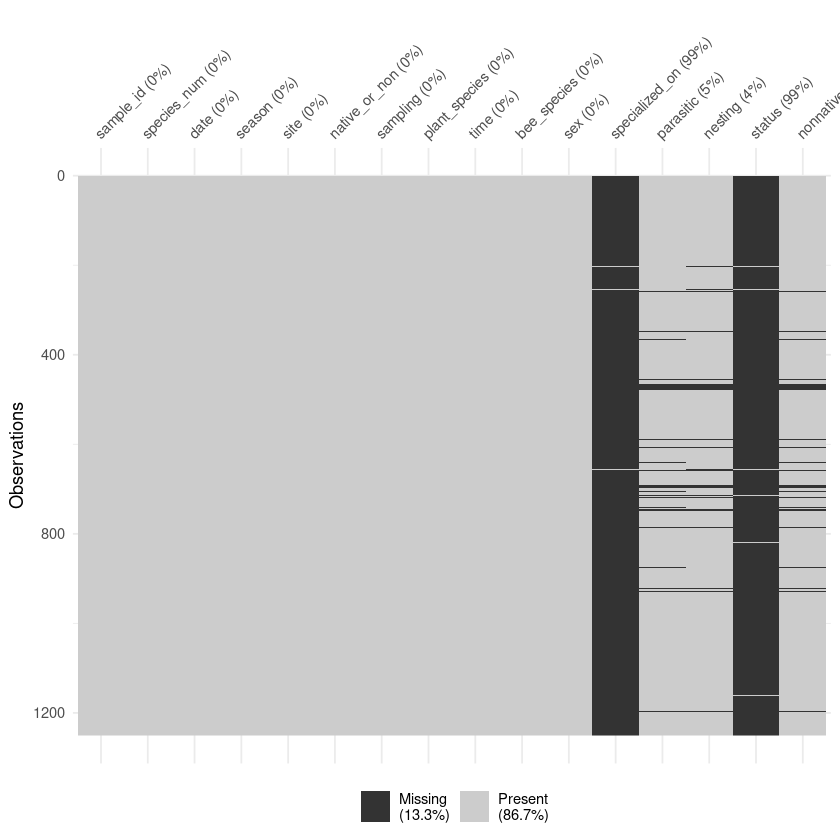

In [5]:
vis_miss(bees_orig)

In [6]:
bees <- bees_orig %>%
           # based on cross-tabulation of parasitic and nesting and external research into parasitic/cuckoo bees
    mutate(parasitic = replace_na(parasitic, "No"),
           nesting = case_when(str_detect(bee_species, "Andrena") ~ "ground",
                               str_detect(bee_species, "Mellisodes") ~ "ground",
                               is.na(nesting) ~ "unknown",
                               TRUE ~ nesting),
           # replace missing values (could make educated guess as well)
           nonnative_bee = replace_na(nonnative_bee, "Unknown"),
           # turn the target around
           native_bee = case_when(nonnative_bee == "Yes" ~ "No",
                                  nonnative_bee == "No" ~ "Yes",
                                  TRUE ~ nonnative_bee),
           # convert all character vectors to factors
           across(where(is.character), as.factor)) %>%
    select(-c(specialized_on, status, nonnative_bee))

In [74]:
plot_binary_var_by_target <- function(plot_width = 7, plot_height = 7, in_df = bees, group_var, var_of_interest, xlabel) {
    # view distribution of variables by the target
    options(repr.plot.width = plot_width, repr.plot.height = plot_height)
    in_df %>%
        group_by({{group_var}}, native_bee) %>%
        summarise(n = n()) %>%
        ungroup() %>%
        group_by({{group_var}}) %>%
        mutate(var_total = sum(n),
               n_prop = n / var_total) %>%
        ggplot(aes(x = {{group_var}}, y = n_prop, fill = native_bee)) +
        geom_col(position = "fill") +
        geom_text(aes(label = paste(round(n_prop * 100, 1), "%", sep = "")), 
                      position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs(x = xlabel, y = "Proportion of bees") +
        scale_fill_brewer(name = "Native bee") +
        theme_classic()
}

p1 <- plot_binary_var_by_target(group_var = native_or_non, xlabel = "Plant Species Type")
p2 <- plot_binary_var_by_target(group_var = sex, xlabel = "Bee Sex")
p3 <- plot_binary_var_by_target(group_var = parasitic, xlabel = "Parasitic Bee Species?")

# options(repr.plot.width = 20, repr.plot.height = 7)
# plot_grid(p1, p2, p3, nrow = 1, ncol = 3)

In [76]:
plot_multi_var_by_target <- function(plot_width = 7, plot_height = 7, in_df = bees, group_var, var_of_interest, xlabel, coord_flip = TRUE) {
    # view distribution of variables by the target
    options(repr.plot.width = plot_width, repr.plot.height = plot_height)
    base_plot <- in_df %>%
        group_by({{group_var}}, native_bee) %>%
        summarise(n = n()) %>%
        ungroup() %>%
        group_by({{group_var}}) %>%
        mutate(var_total = sum(n),
               n_prop = n / var_total) %>%
        ggplot(aes(x = fct_reorder({{group_var}}, n_prop, .fun = max), y = n_prop, fill = native_bee)) +
        geom_col(position = "fill") +
        geom_text(aes(label = paste(round(n_prop * 100, 1), "%", sep = "")), 
                      position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs(x = xlabel, y = "Proportion of bees") +
        scale_fill_brewer(name = "Native bee") +
        theme_classic()
    if (coord_flip == TRUE) {
        base_plot + coord_flip()
    } else {
        base_plot
    }
}

p1 <- plot_multi_var_by_target(group_var = site, xlabel = "Collection Site", coord_flip = FALSE)
p2 <- plot_multi_var_by_target(group_var = plant_species, xlabel = "Plant Species")
p3 <- plot_multi_var_by_target(group_var = nesting, xlabel = "Bee Nesting Method", coord_flip = FALSE)

# options(repr.plot.width = 15, repr.plot.height = 7)
# plot_grid(p1, p3, nrow = 1, ncol = 2)
# options(repr.plot.width = 15, repr.plot.height = 7)
# p2

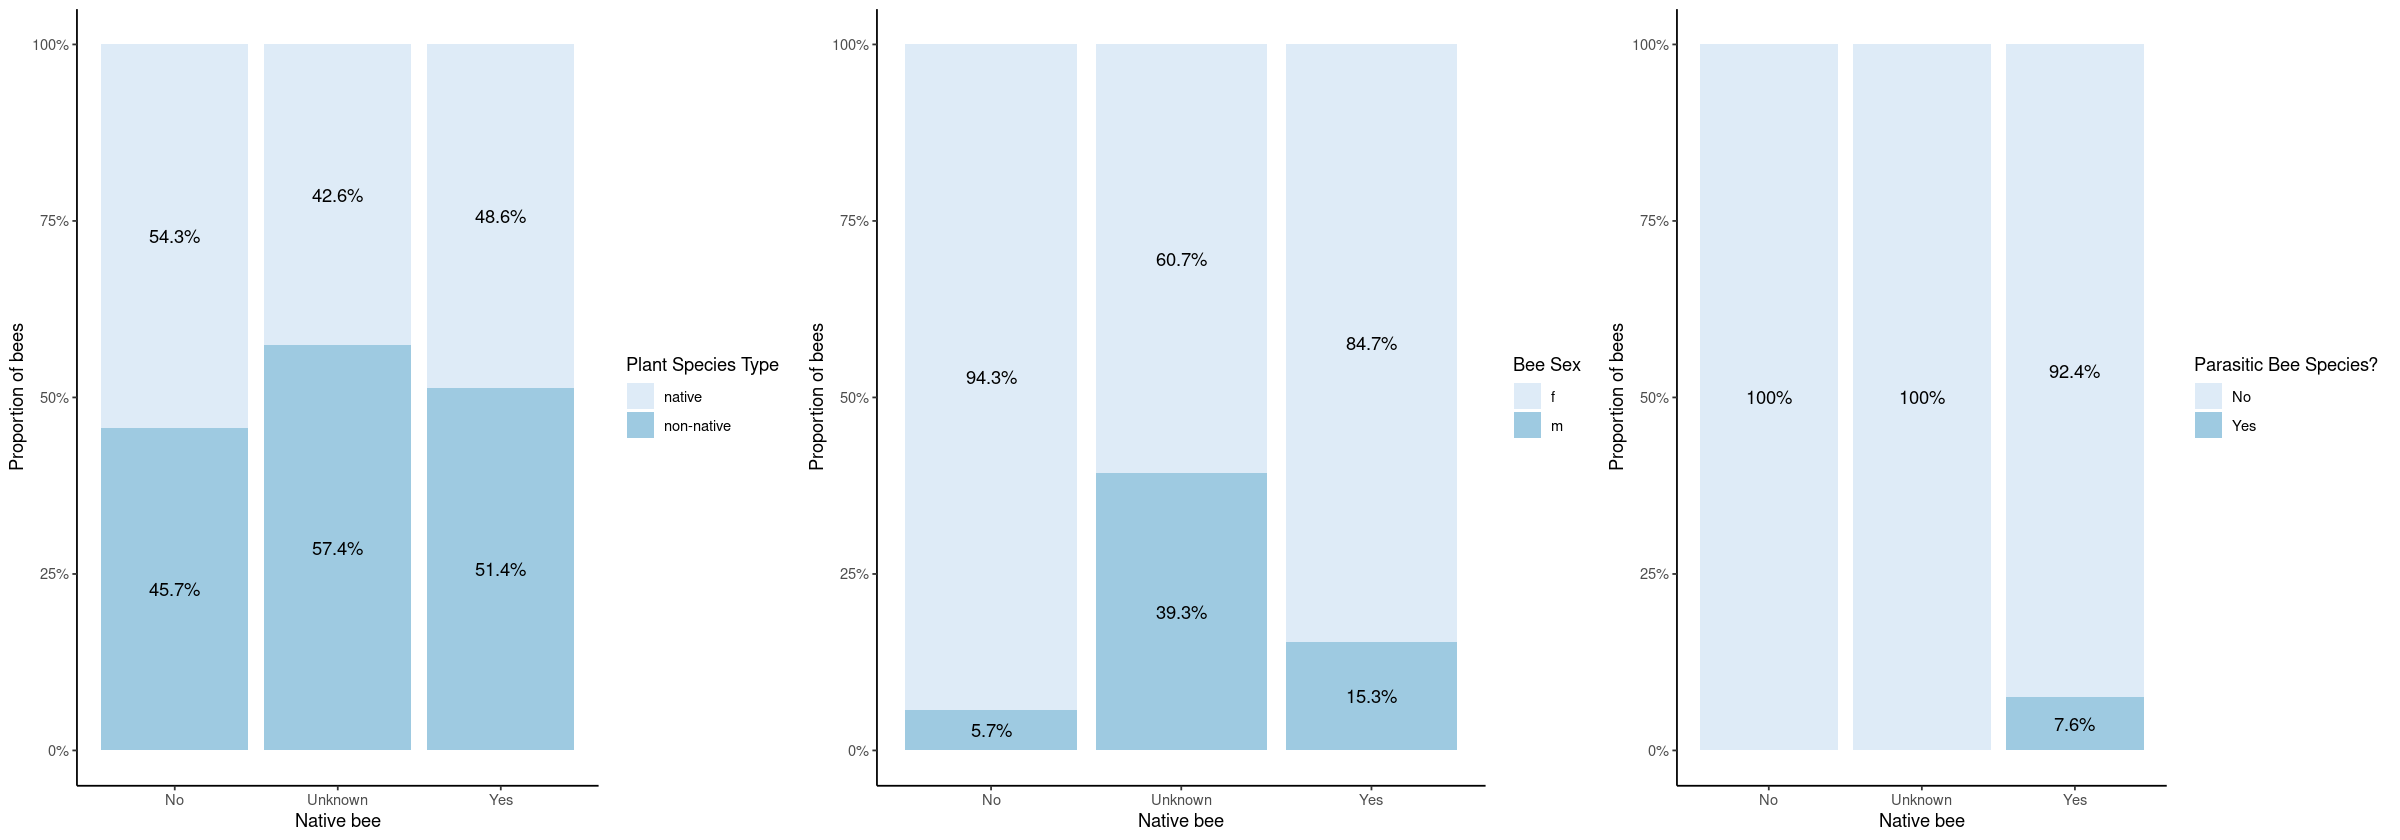

In [9]:
# flip the charts around to see what they say
plot_binary_var_by_target2 <- function(plot_width = 7, plot_height = 7, in_df = bees, group_var, var_of_interest, legend_title) {
    # view distribution of variables by the target
    options(repr.plot.width = plot_width, repr.plot.height = plot_height)
    in_df %>%
        group_by(native_bee, {{group_var}}) %>%
        summarise(n = n()) %>%
        ungroup() %>%
        group_by(native_bee) %>%
        mutate(var_total = sum(n),
               n_prop = n / var_total) %>%
        ggplot(aes(x = native_bee, y = n_prop, fill = {{group_var}})) +
        geom_col(position = "fill") +
        geom_text(aes(label = paste(round(n_prop * 100, 1), "%", sep = "")), 
                      position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Native bee", y = "Proportion of bees") +
        scale_fill_brewer(name = legend_title) +
        theme_classic()
}

p1 <- plot_binary_var_by_target2(group_var = native_or_non, legend_title = "Plant Species Type")
p2 <- plot_binary_var_by_target2(group_var = sex, legend_title = "Bee Sex")
p3 <- plot_binary_var_by_target2(group_var = parasitic, legend_title = "Parasitic Bee Species?")

options(repr.plot.width = 20, repr.plot.height = 7)
plot_grid(p1, p2, p3, nrow = 1, ncol = 3)

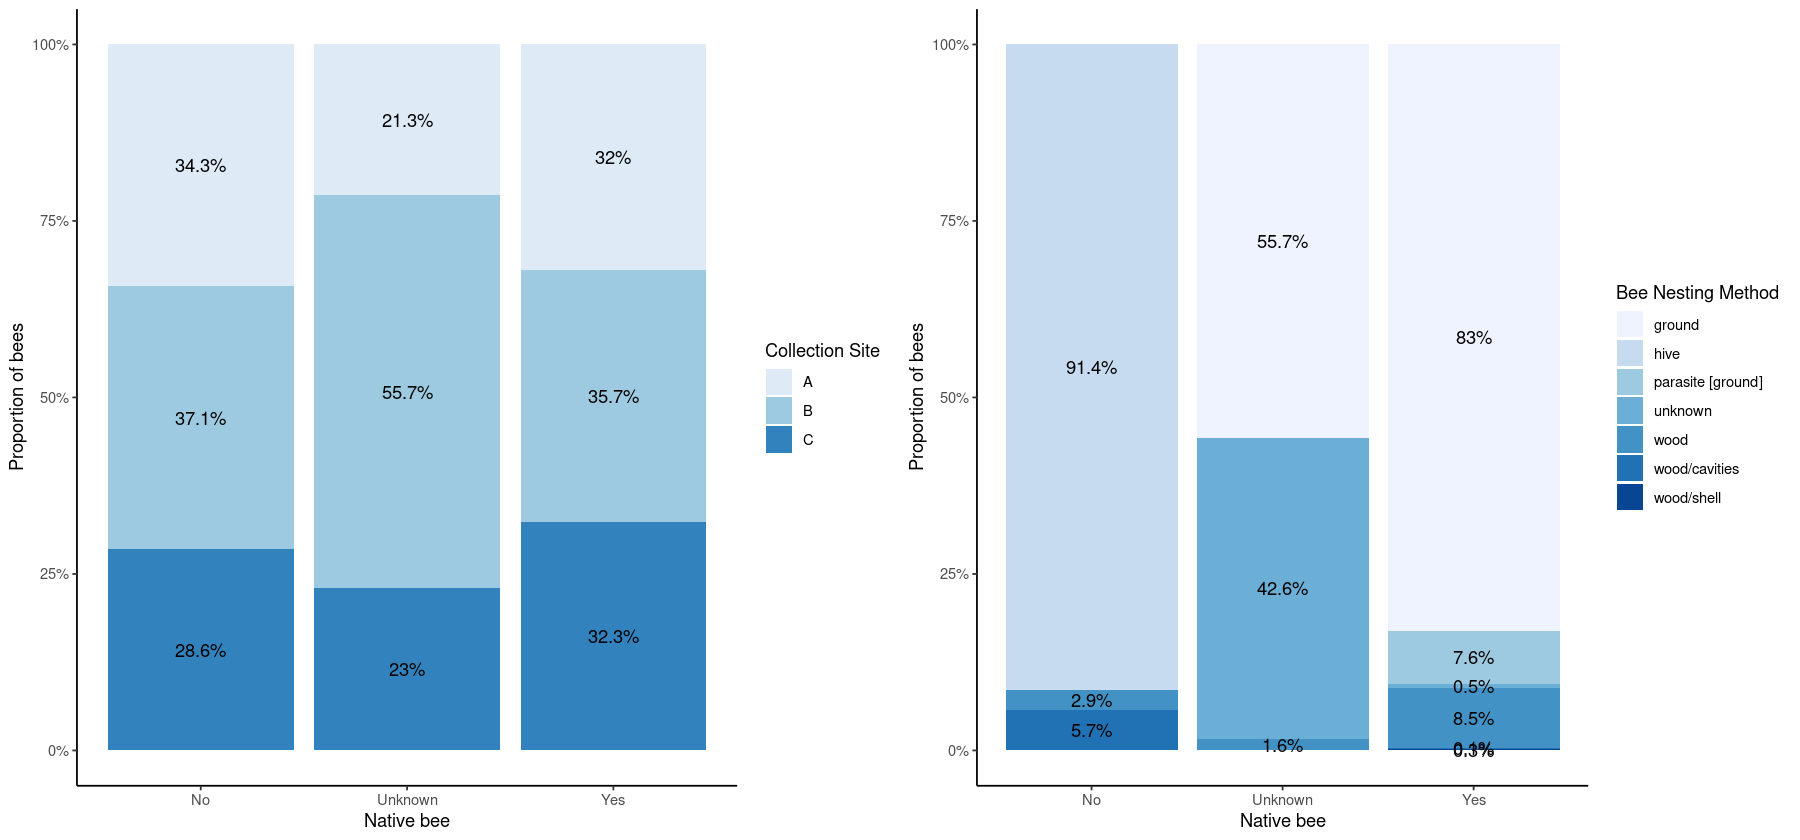

In [10]:
plot_multi_var_by_target2 <- function(plot_width = 7, plot_height = 7, in_df = bees, group_var, var_of_interest, legend_title, coord_flip = TRUE, brewer_scale = TRUE) {
    # view distribution of variables by the target
    options(repr.plot.width = plot_width, repr.plot.height = plot_height)
    base_plot <- in_df %>%
        group_by(native_bee, {{group_var}}) %>%
        summarise(n = n()) %>%
        ungroup() %>%
        group_by(native_bee) %>%
        mutate(var_total = sum(n),
               n_prop = n / var_total) %>%
        ggplot(aes(x = native_bee, y = n_prop, fill = {{group_var}})) +
        geom_col(position = "fill") +
        geom_text(aes(label = paste(round(n_prop * 100, 1), "%", sep = "")), 
                      position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs(x = "Native bee", y = "Proportion of bees") +
        theme_classic()
    
    if (coord_flip == TRUE & brewer_scale == TRUE) {
        base_plot + coord_flip() + scale_fill_brewer(name = legend_title)
    } else if (coord_flip == TRUE & brewer_scale == FALSE) {
        base_plot + coord_flip()
    } else if (coord_flip == FALSE & brewer_scale == TRUE) {
        base_plot + scale_fill_brewer(name = legend_title)
    } else {
        base_plot
    }
}

p1 <- plot_multi_var_by_target2(group_var = site, legend_title = "Collection Site", coord_flip = FALSE)
p2 <- plot_multi_var_by_target2(group_var = nesting, legend_title = "Bee Nesting Method", coord_flip = FALSE)

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(p1, p2, nrow = 1, ncol = 2)

In [11]:
# perform a chi-squared test of independence between plant species and bee type
counts <- table(bees$native_bee, bees$native_or_non)
# print(chisq.test(counts))
# and between collection site and bee type
counts <- table(bees$native_bee, bees$site)
# print(chisq.test(counts))

In [12]:
# conduct a set of post-hoc tests on the latter with a bonferroni correction
# i.e the p-values are divided by the number of tests performed
test_matrix <- table(bees$native_bee, bees$site)

test_resids <- chisq.test(test_matrix)$stdres
chisq_test_stats <- test_resids^2
pvals <- pchisq(chisq_test_stats, 1, lower.tail = FALSE)

# apply the correction. This approach multiplies the p-values by the number of
# tests. An alternative is to divide alpha by the number of tests.
# Bonferroni is a very conservative approach. Holm is also valid under arbitrary
# conditions and is slightly less conservative
adj_pvals <- pvals
for (i in 1:nrow(adj_pvals)) {
    adj_pvals[i, ] <- p.adjust(adj_pvals[i, ], method = "holm", n = ncol(adj_pvals) * nrow(adj_pvals))
}

The five plots above show the distribution of bee type (native vs non-native) by collected bee characteristics (plus the collection sites). The first plot qualitatively indicated a slight preference for non-native plants for native bees and bees who could not be identified, and the reverse for non-native bees. However, a one-proportion Z test indicated that the differences in proportions were statistically insignificant. The fourth plot shows the distribution of bee types across the different sites and a chi-squared test of proportions (an equivalent test to the Z test but for three categories instead of two) plus additional post-hoc tests indicated that the profile of site B was statistically different from the other two.

A summary of the statistical test results are presented in the table below.

| Variable | $\chi^2$ | degrees of freedom | p-value |
| -------- | -------- | ------------------ | ------- |
| Plant type | 1.32 | 2 | 0.5153 |
| Collection site | 10.23 | 4 | 0.0367* |
| - A - Native | 1.4458 | 1 | 1.0000 |
| - B - Native | 6.7027 | 1 | 0.0866. |
| - C - Native | 2.1925 | 1 | 1.0000 |
| - A - Non-native | 0.1276 | 1 | 1.0000 |
| - B - Non-native | 0.0028 | 1 | 1.0000 |
| - C - Non-native | 0.1689 | 1 | 1.0000 |
| - A - Unknown | 3.0962 | 1 | 0.6278 |
| - B - Unknown | 9.9817 | 1 | 0.0142* |
| - C - Unknown | 2.2962 | 1 | 0.9078 |


The three plots below show the distribution of bees across the different plant species at the collection sites (if at least one bee was found on that species) by bee type.
- Native bees were typically found on *Leucanthemum vulgare* (ox-eye daisy; 26.0%) and *Rudbeckia hirta* (black-eyed susan; 13.0%) plants.
- Non-native bees were only found on *Trifolium incarnatum* (crimson clover) and *Daucus carota* (Queen Anne's lace) in equal proportions.
- Unknown bees were typically found on *Melilotus officinalis* (sweet yellow clover; 33.3%) and *Rudbeckia hirta* (22.2%).

Note that these proportions exclude the 66.0%, 41.0% and 94.3% of native, unknown and non-native respectively bees that were sampled from the air instead of having landed on a plant.

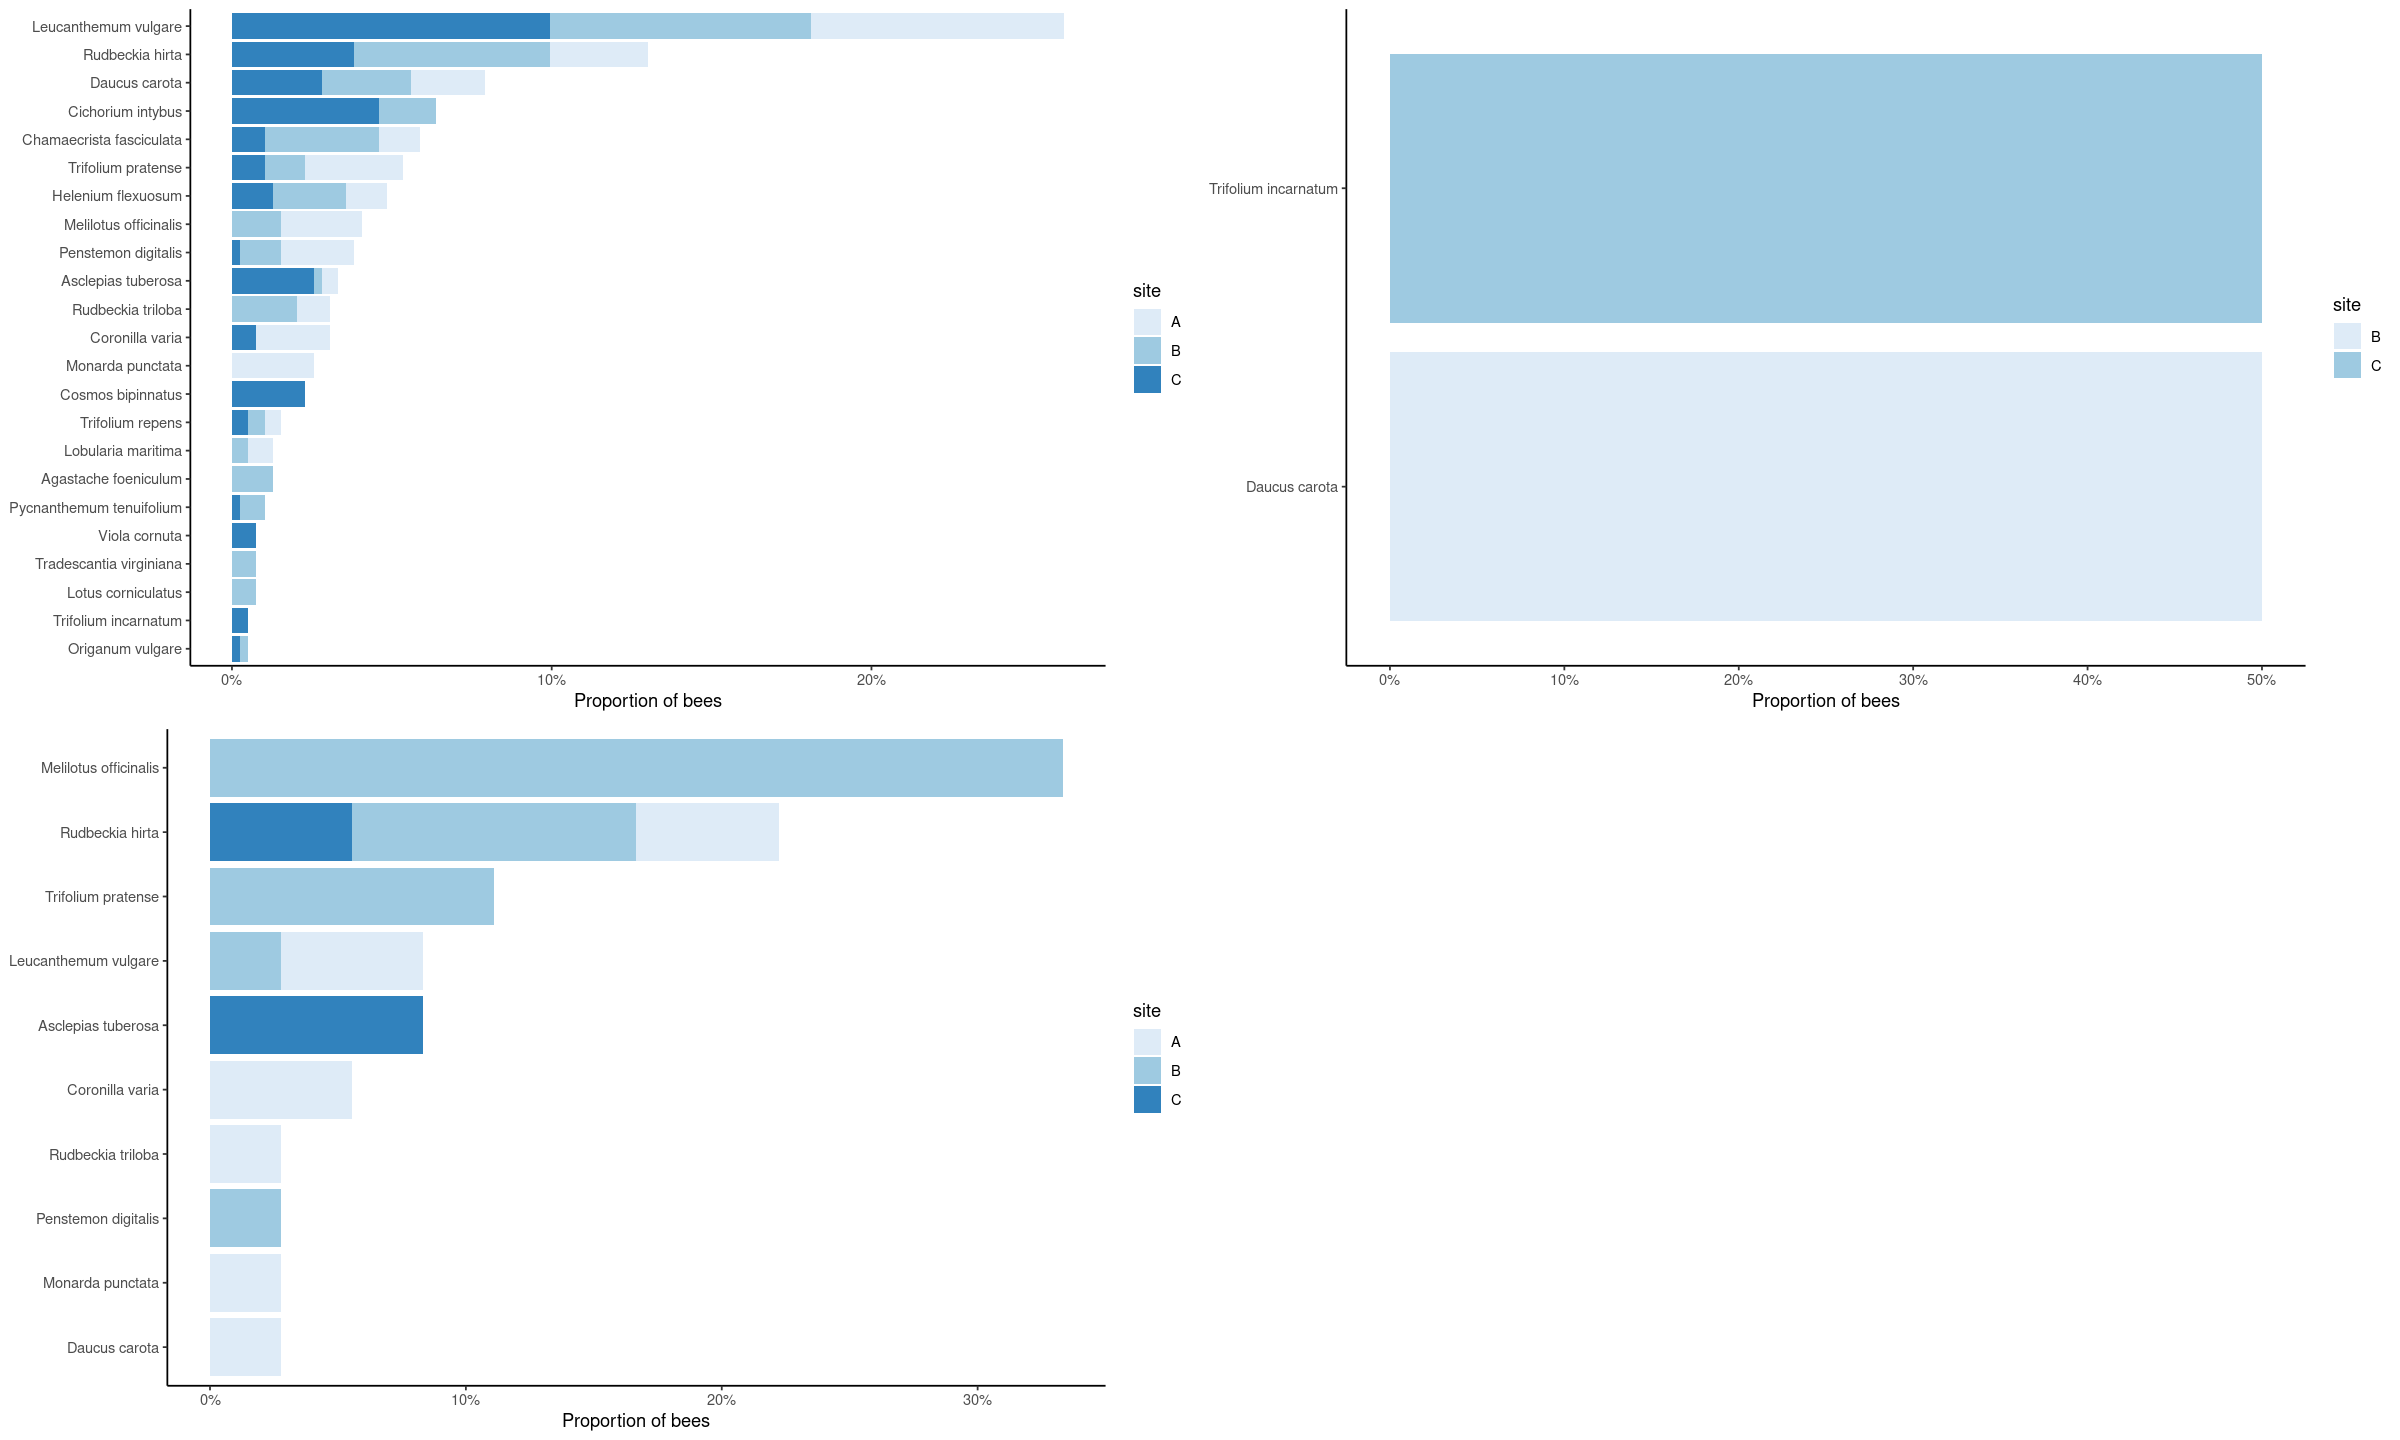

In [13]:
gen_plant_plot <- function(in_df = bees, native_bee_filter) {
    in_df %>%
        filter(native_bee == native_bee_filter) %>%
        filter(plant_species != "Air") %>%
        group_by(plant_species, site) %>%
        summarise(num_bees = n()) %>%
        group_by(plant_species) %>%
        mutate(plot_order = sum(num_bees)) %>%
        ungroup() %>%
        mutate(prop_bees = num_bees / sum(num_bees)) %>%
        arrange(desc(prop_bees)) %>%
        ggplot(aes(x = fct_reorder(plant_species, plot_order), y = prop_bees)) +
        geom_col(aes(fill = site)) +
        scale_y_continuous(labels = scales::percent) +
        coord_flip() +
        scale_fill_brewer() +
        labs(x = NULL, y = "Proportion of bees") +
        theme_classic()    
}

p1 <- gen_plant_plot(native_bee_filter = "Yes")
p2 <- gen_plant_plot(native_bee_filter = "No")
p3 <- gen_plant_plot(native_bee_filter = "Unknown")

options(repr.plot.width = 20, repr.plot.height = 12)
plot_grid(p1, p2, p3, nrow = 2, ncol = 2) 

The following plots shows the interaction between the different plant and bee species, where the different bee species are on the top and the different plant species on the bottom. A line between the top and bottom of the chart showed that an interaction existed, and the width of the line indicated how many times that particular interaction occurred in the dataset. Bee species that were sampled from the air were excluded.
- The first plot shows every bee-plant interaction that occurred in the dataset. Some plant species were visited by only a handful of bee species, but others were visited by a wider range of species. Similarly, some bee species visited only a single plant species, others visited a wide range of species, and everything in between.
- The second plot shows the same thing, but just for native bee species.
- The final plot removes any bee-plant interactions that only occurred once. It highlights more clearly the tentative conclusion that there are some bee species that more of a generalist and visit a range of plant species (notably the *Halictus poeyi/ligatus* or Poey's Furrow Bee), but others appear to be specialised to a particular plant species (such as *Lasioglossum trigeminum*). This means that the plant species preferences of specialist (native) bees should be considered, especially if larger concentrations of those species are known to inhabit a particular area.

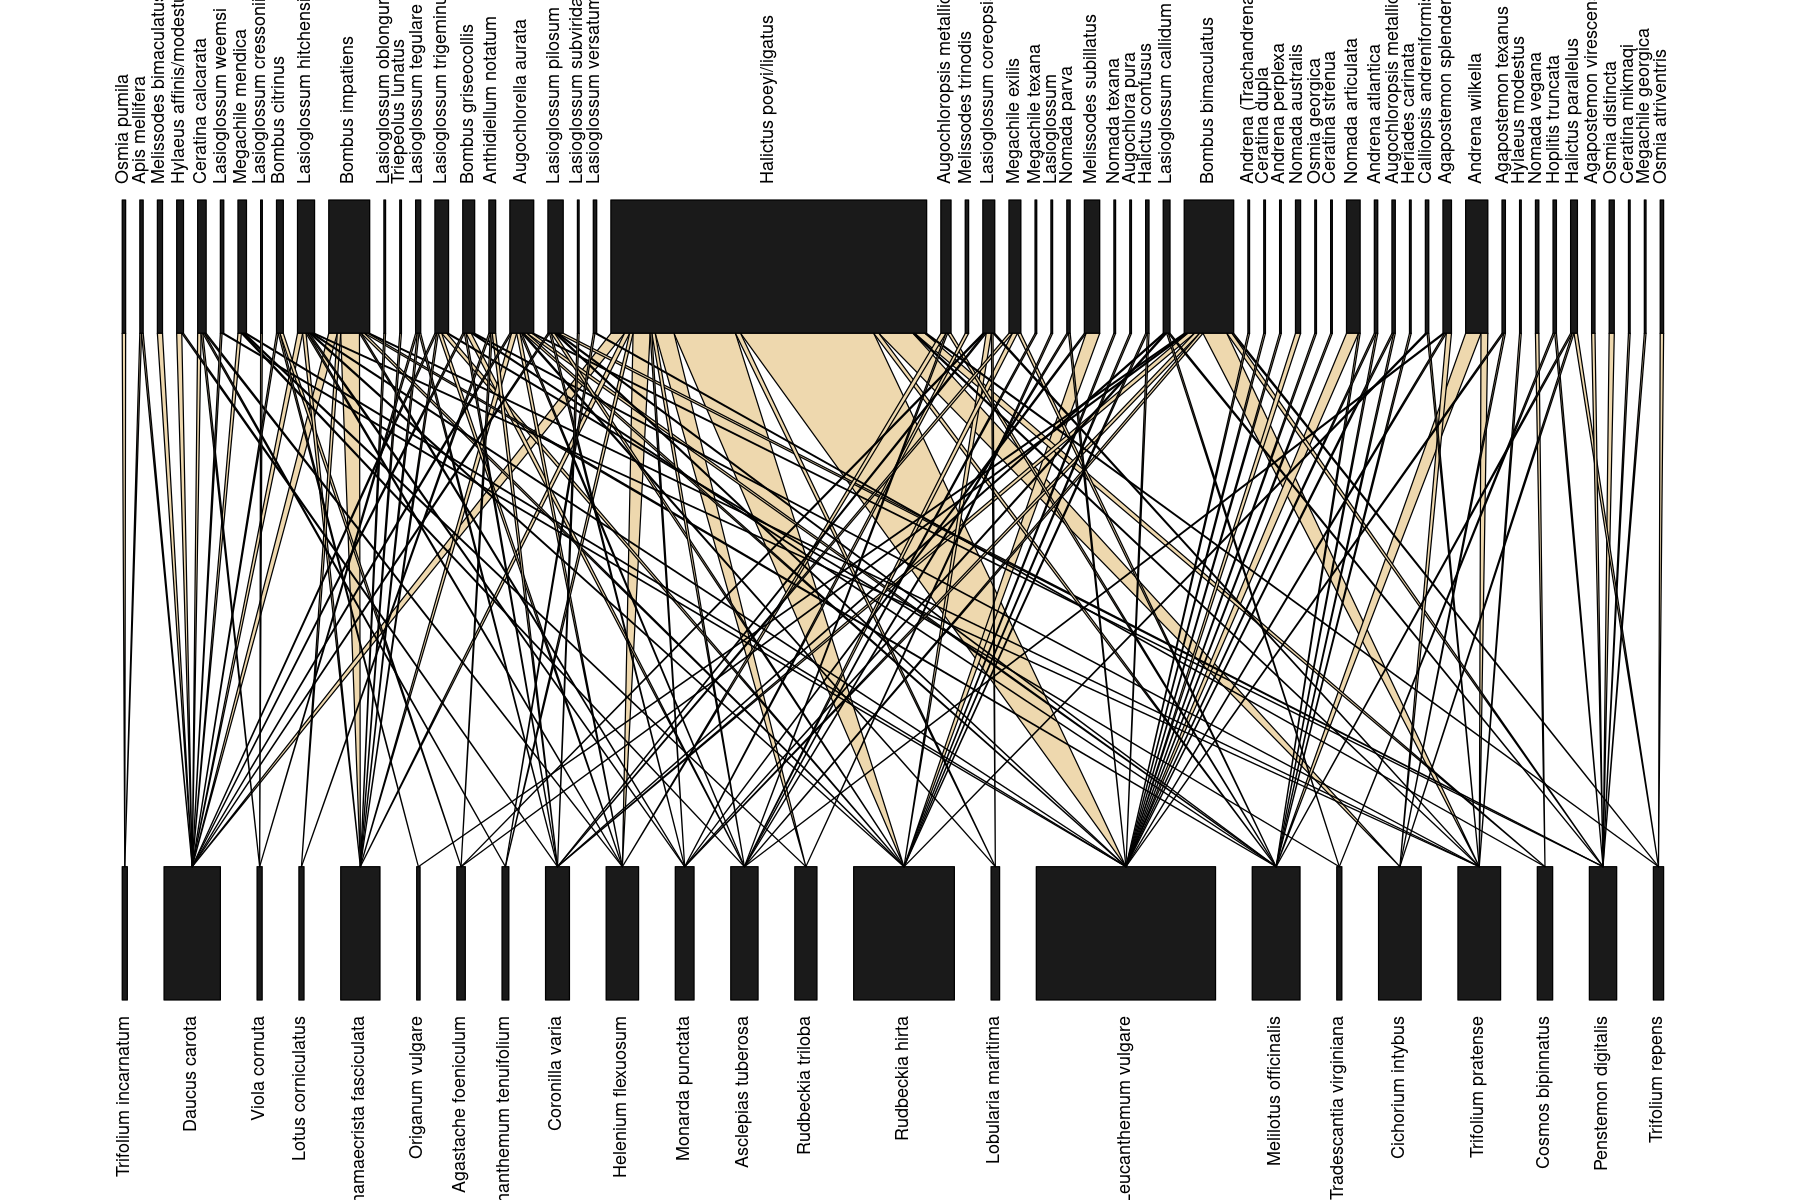

In [84]:
# build an adjacency matrix of pollinators and bee species interactions
bee_data <- bees %>%
    select(plant_species, bee_species) %>%
    filter(plant_species != "Air") %>%
    mutate(site = "all")
bee_array <- frame2webs(bee_data, varnames = c("plant_species", "bee_species", "site"))$"all"

# calculate relevant statistics on the degree of specialisation
all_counts <- nrow(bee_data)
all_d <- specieslevel(bee_array, level="higher", index=c("d")) %>% arrange(d)
all_links <- networklevel(bee_array)['links per species']
all_h2 <- networklevel(bee_array)['H2']

# allow plotting outside the graph
par(xpd = T)
# plot the graph
options(repr.plot.width = 15, repr.plot.height = 10)
plotweb(bee_array, labsize = 1.5, text.rot = 90, arrow="down.center", col.interaction="wheat2")

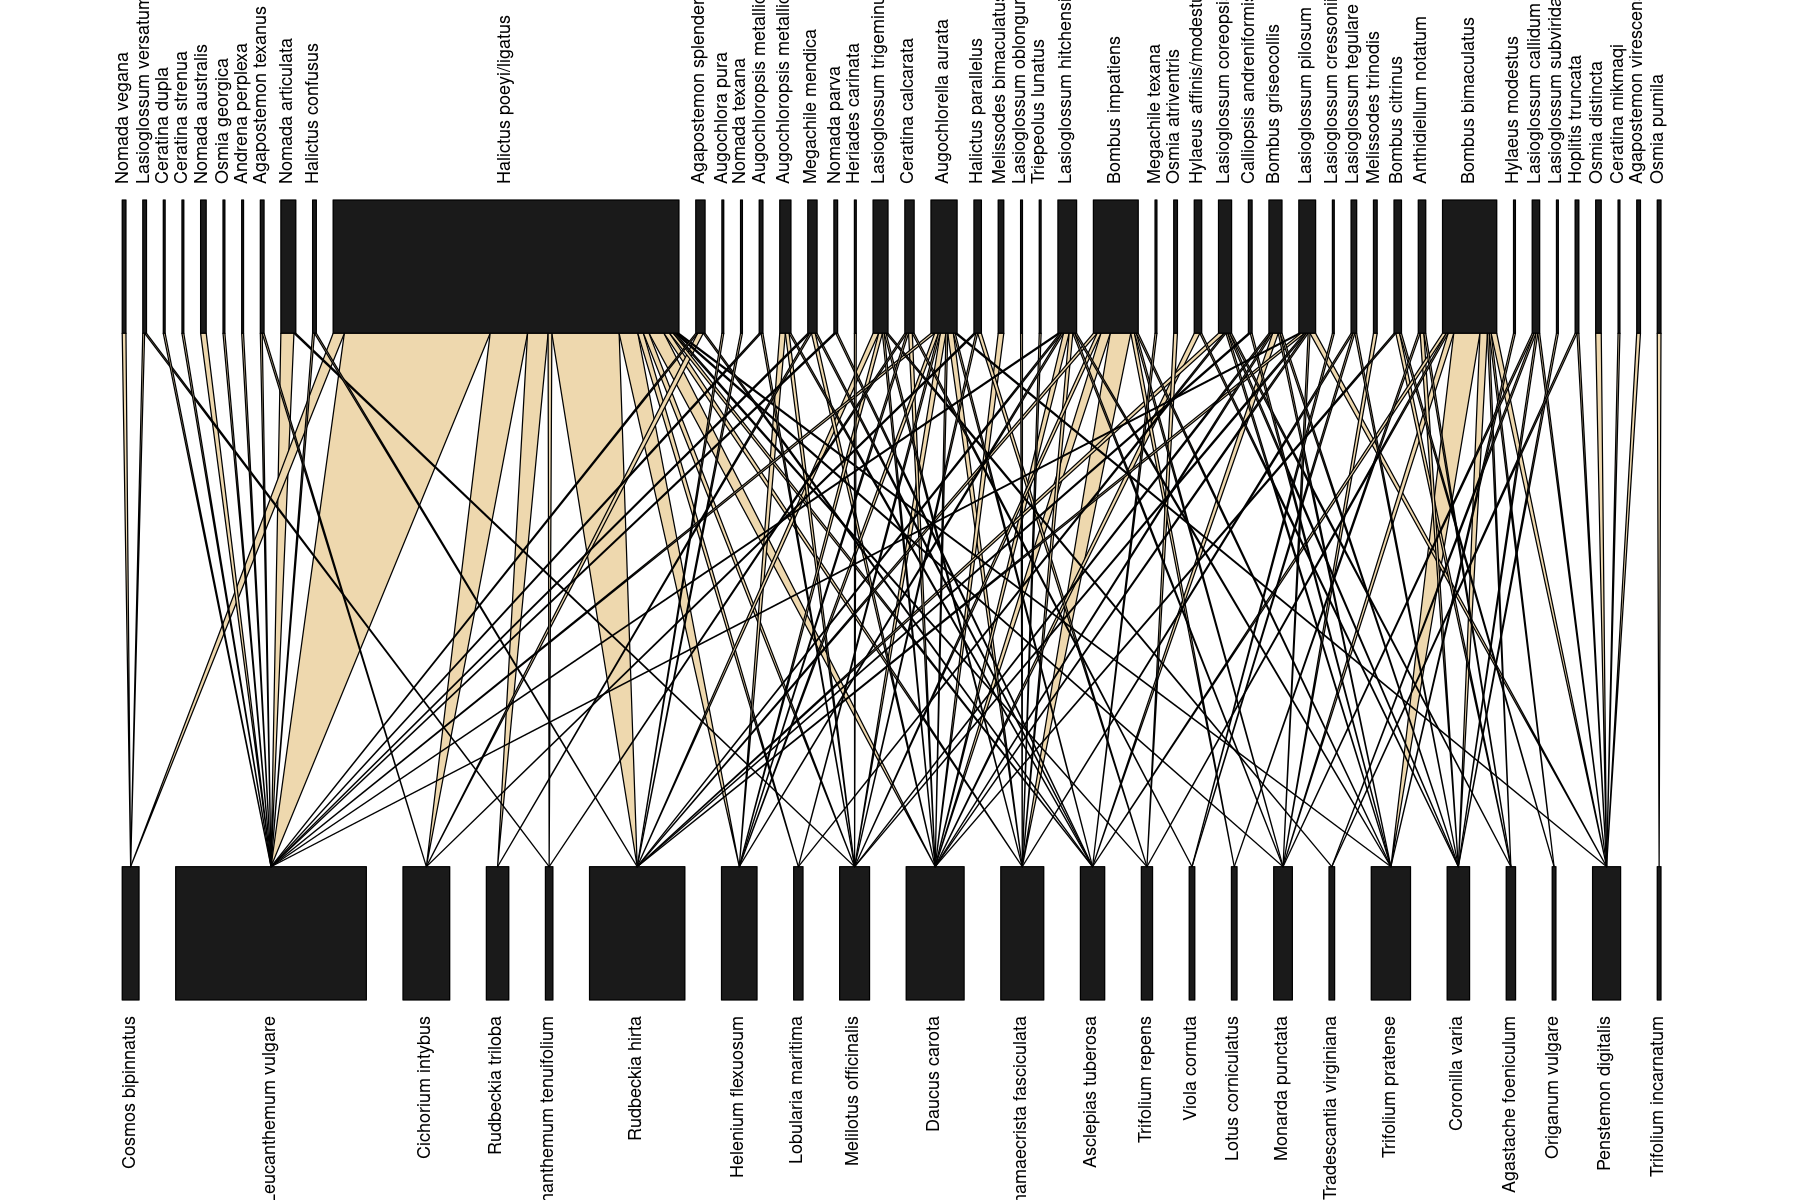

In [85]:
# build an adjacency matrix of pollinators and bee species interactions
bee_data <- bees %>%
    select(plant_species, bee_species, native_bee) %>%
    filter(plant_species != "Air") %>%
    filter(native_bee == "Yes") %>%
    mutate(site = "all")
bee_array <- frame2webs(bee_data, varnames = c("plant_species", "bee_species", "site"))$"all"

# calculate relevant statistics on the degree of specialisation
native_counts <- nrow(bee_data)
native_d <- specieslevel(bee_array, level="higher", index=c("d")) %>% arrange(d)
native_links <- networklevel(bee_array)['links per species']
native_h2 <- networklevel(bee_array)['H2']

# allow plotting outside the graph
par(xpd = T)
# plot the graph
plotweb(bee_array, labsize = 1.5, text.rot = 90, arrow="down.center", col.interaction="wheat2")

In [93]:
# build an adjacency matrix of pollinators and bee species interactions
bee_data <- bees %>%
    select(plant_species, bee_species, native_bee) %>%
    filter(plant_species != "Air") %>%
    filter(native_bee != "Yes") %>%
    mutate(site = "all")
bee_array <- frame2webs(bee_data, varnames = c("plant_species", "bee_species", "site"))$"all"

# calculate relevant statistics on the degree of specialisation
nonnative_counts <- nrow(bee_data)
nonnative_d <- specieslevel(bee_array, level="higher", index=c("d")) %>% arrange(d)
nonnative_links <- networklevel(bee_array)['links per species']
nonnative_h2 <- networklevel(bee_array)['H2']

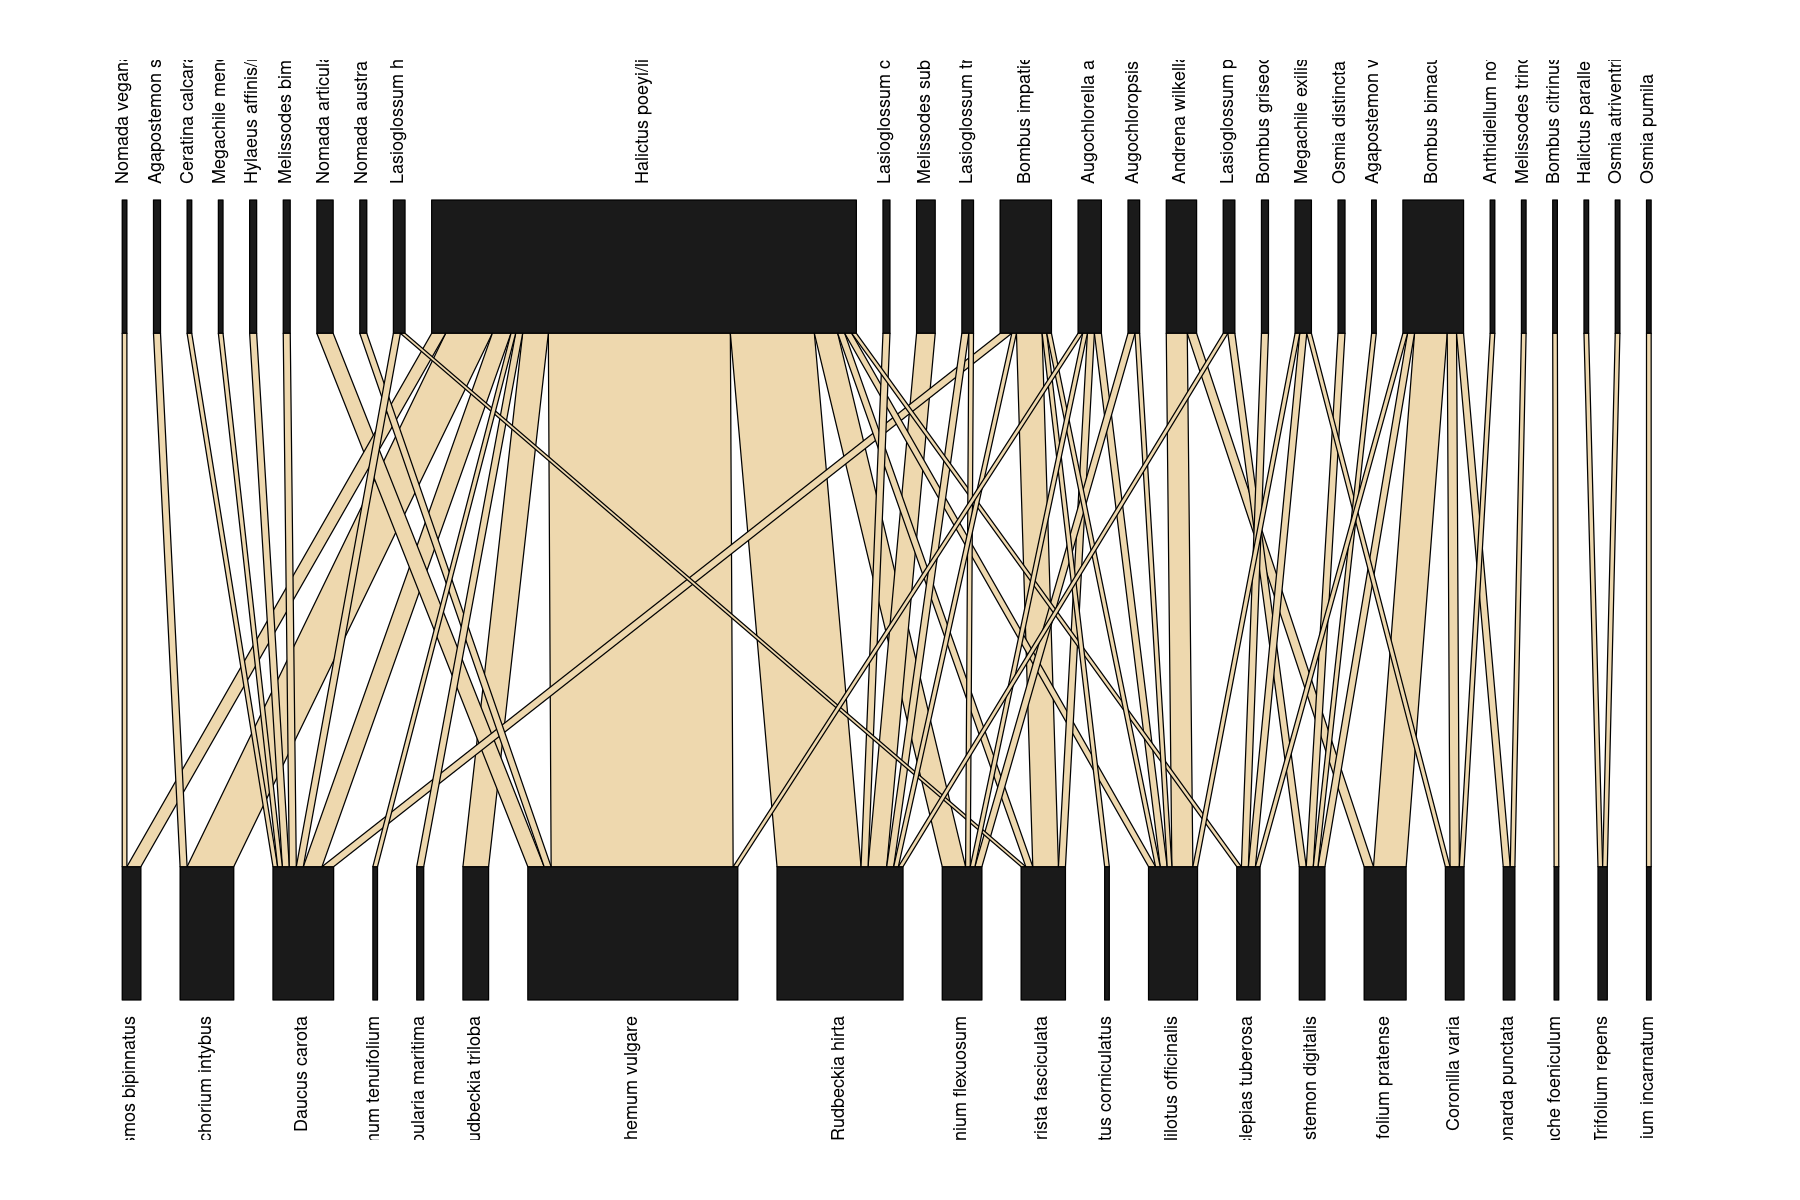

In [86]:
# Build an adjacency matrix of pollinators and bee species interactions
bee_data <- bees %>%
    select(plant_species, bee_species) %>%
    filter(plant_species != "Air") %>%
    count(plant_species, bee_species) %>%
    mutate(site = "all") %>%
    filter(n > 1) %>%
    select(plant_species, bee_species, site, n)
bee_data2 <- as.data.frame(lapply(bee_data, rep, bee_data$n)) %>% select(-n)
bee_array <- frame2webs(bee_data2, varnames = c("plant_species", "bee_species", "site"))$"all"

# calculate relevant statistics on the degree of specialisation
filtered_counts <- nrow(bee_data)
filtered_d <- specieslevel(bee_array, level="higher", index=c("d")) %>% arrange(d)
filtered_links <- networklevel(bee_array)['links per species']
filtered_h2 <- networklevel(bee_array)['H2']

plotweb(bee_array, labsize = 1.5, text.rot = 90, col.interaction="wheat2")

The table below presents a set of summary statistics about the degree of specialisation of the bee species in the dataset with respect to the number and types of plant species visited, plus the counts of bees/plants for reference.

- *Links per species* refers to the average (mean) number of plant species visited, which means that a value greater than 1 indicates that more bees are generalists than strictly preferring a single plant species. The value for non-native bees is less than one, which indicates that these bees tend to be specialists.
- *H2'* is a network measure of specialisation and ranges from a value of 0 (no specialisation) to 1 (complete specialisation). The values here are roughly consistent with *links for species*. Native bees are more generalists than specialists (albeit only just given the proximity to the mid-point score of 0.5, and non-native bees are more specialists than generalists.
- *d'* is a measure of the specialisation of a species based on its discrimination from a random selection of partners. Like H', it ranges ranges from a value of 0 (no specialisation) to 1 (complete specialisation). However, values for this measure can be a little misleading in presence of low counts, which is one reason for apparent discrepancies between the charts and the species shown in the table.

| Metric | Entire dataset | Native only | Non-native only | More than 1 interaction |
| ------ | -------------- | ---------------- | -------------------- | ------------------------------------- |
| n | 430 | 392 | 38 | 58 |
| Links per bee species | 1.88 | 1.89 | 0.8 | 1.18 |
| H2' | 0.43 | 0.42 | 0.77 | 0.59 |
| d' top generalists | Andrena (Trachandrena), Andrena perplexa, Ceratina dupla, Ceratina strenua, Halictus confusus, Osmia georgica | Andrena perplexa, Ceratina dupla, Ceratina strenua, Halictus confusus, Osmia georgica | Andrena atlantica, Andrena (Trachandrena) | Nomada australis, Nomada articulata, Lasioglossum coreopsis, Augochlorella aurata, Lasioglossum trigeminum |
| d' top specialists | Osmia pumila, Lasioglossum cressonii, Osmia atriventris | Osmia pumila, Lasioglossum cressonii, Osmia atriventris | Melissodes subillatus, Megachile georgica, Lasioglossum | Osmia pumila, Bombus citrinus|

There were 80 samples taken during the collection phase, and the number of bees in each of those samples ranged from 1 to 45. The average number of bees in a sample was 16. The sample chosen for a case study analysis of the bees and plant species (17434) was selected by calculating the size of each sample, then the number of plant species in that sample and finding and sample with a reasonable number of both. The characteristics of the sample are presented in the table below and charts of the distribution of plant and bee species are under the table.

| Characteristic | Value |
| -------------- | ----- |
| Season | Late |
| Date | 18-July-2017 |
| Time | 9:15am |
| Collection site | C |
| Sampling method | Hand netting |
| Number of bees | 34 |
| Number of bee species | 7 |
| Number of non-native bee species | 0 |
| Number of males | 8 (23%) |
| Number of parasitic species | 2 (28.6%) |
| Number of species ground nesting | 7 (100%) |
| Most common species | Halictus poeyi/ligatus (22 bees) |
| Least common species | Agapostemon texanus / Halictus parallelus (1 bee) |
| Number of plant species | 5 |
| Number of native plant species | 0 |
| Most common species | Cichorium intybus (Common chicory; 18 plants) |
| Least common species | Origanum vulgare (Oregano; 1 plant) |

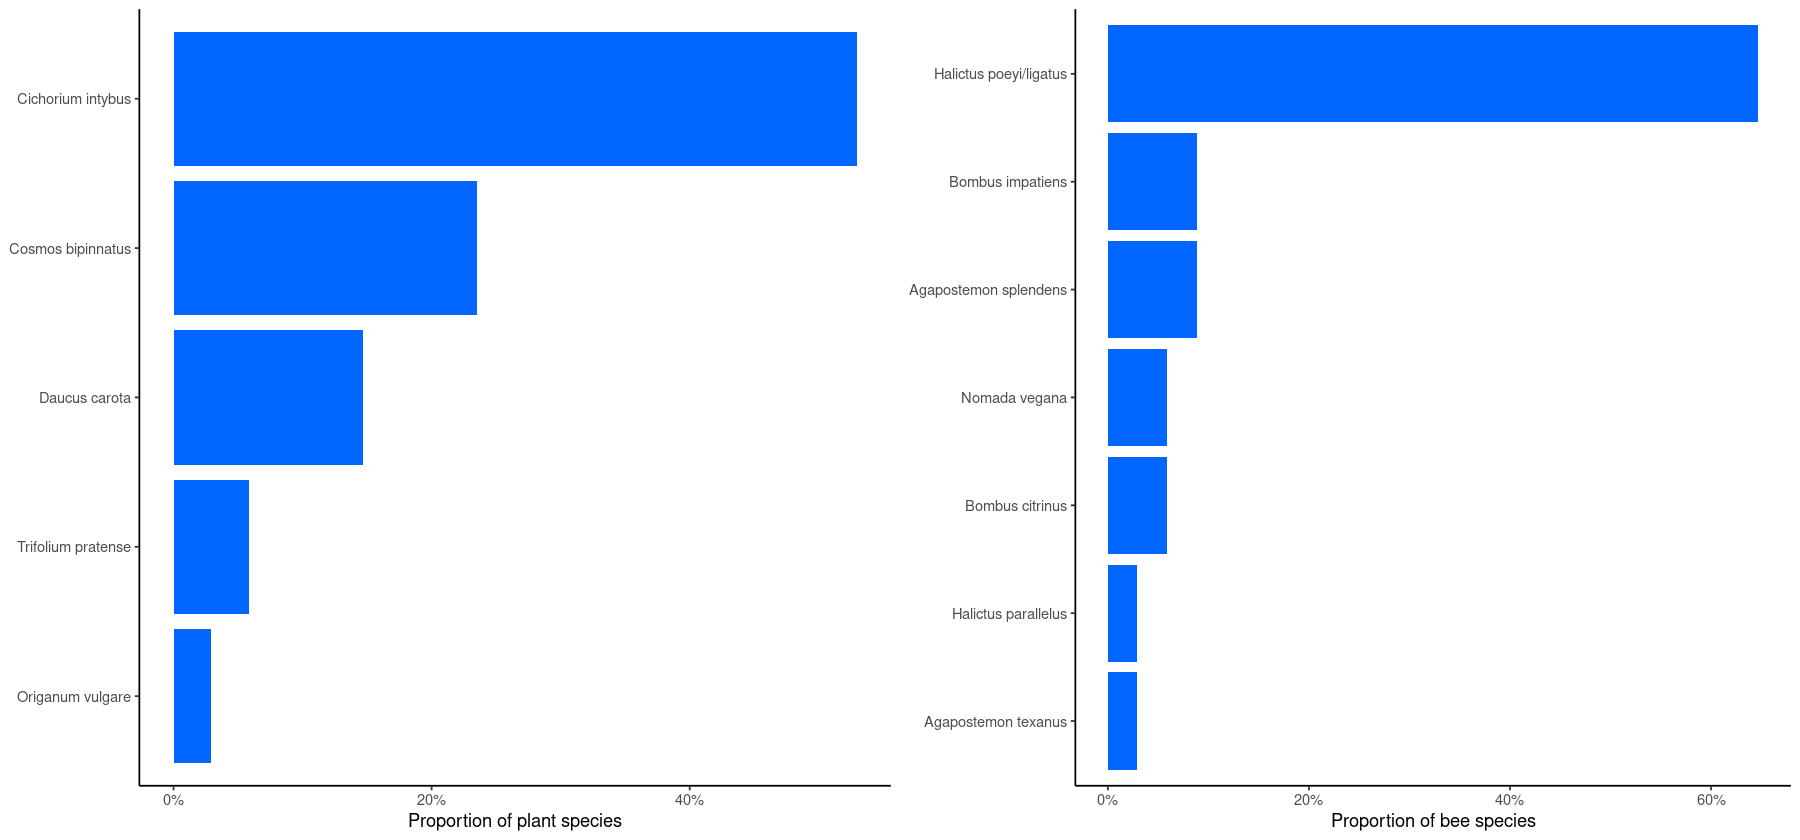

In [105]:
p1 <- bees %>%
    filter(sample_id == 17473) %>%
    count(plant_species) %>%
    mutate(prop_n = n / sum(n)) %>%
    arrange(desc(prop_n)) %>%
    ggplot(aes(x = fct_reorder(plant_species, prop_n), y = prop_n)) +
    geom_col(fill = "#0066FF") +
    scale_y_continuous(labels = scales::percent) +
    coord_flip() +
    labs(x = NULL, y = "Proportion of plant species") +
    theme_classic()

p2 <- bees %>%
    filter(sample_id == 17473) %>%
    count(bee_species) %>%
    mutate(prop_n = n / sum(n)) %>%
    arrange(desc(prop_n)) %>%
    ggplot(aes(x = fct_reorder(bee_species, prop_n), y = prop_n)) +
    geom_col(fill = "#0066FF") +
    scale_y_continuous(labels = scales::percent) +
    coord_flip() +
    labs(x = NULL, y = "Proportion of bee species") +
    theme_classic()

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(p1, p2, nrow = 1, ncol = 2) 